In [1]:
# Packages
library(ggplot2)  # visualization
library(dplyr)    # data manipulation
library(tidyr)    # reshape and clean data
library(forcats)  # working with factors


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Read the dataset and load it to a data frame
file_path <- "/content/CreditCardFraud_Dataset-4.csv"
df <- read.csv(file_path)
# Data transformations
df$MerchantID <- as.factor(df$MerchantID)         # Ensures proper grouping in plots/summaries
df$TransactionType <- as.factor(df$TransactionType)  # So ggplot doesn't treat it as text
df$Class <- factor(df$Class, levels = c("Normal", "Fraudulent"))  # So "Fraudulent" is the positive class

In [3]:
# Convert Time to a "time of day" feature
df$Hour <- floor(df$Time / 3600) %% 24

In [4]:
# Step 1: Count transactions by Hour and Class
hourly_summary <- df %>%
  group_by(Hour, Class) %>%
  summarise(TransactionCount = n(), .groups = "drop") %>%
  pivot_wider(
    names_from = Class,
    values_from = TransactionCount,
    names_prefix = "Class_",
    values_fill = 0
  ) %>%
  mutate(
    Total = Class_Fraudulent + Class_Normal,
    FraudRate = round(100 * Class_Fraudulent / Total, 2)
  ) %>%
  arrange(Hour)
print(hourly_summary)

# A tibble: 24 × 5
    Hour Class_Normal Class_Fraudulent Total FraudRate
   <dbl>        <int>            <int> <int>     <dbl>
 1     0          396                0   396         0
 2     1          378                0   378         0
 3     2          392                0   392         0
 4     3          394                0   394         0
 5     4          416                0   416         0
 6     5          424                0   424         0
 7     6          411                0   411         0
 8     7          402                0   402         0
 9     8          416                0   416         0
10     9          411                0   411         0
# ℹ 14 more rows


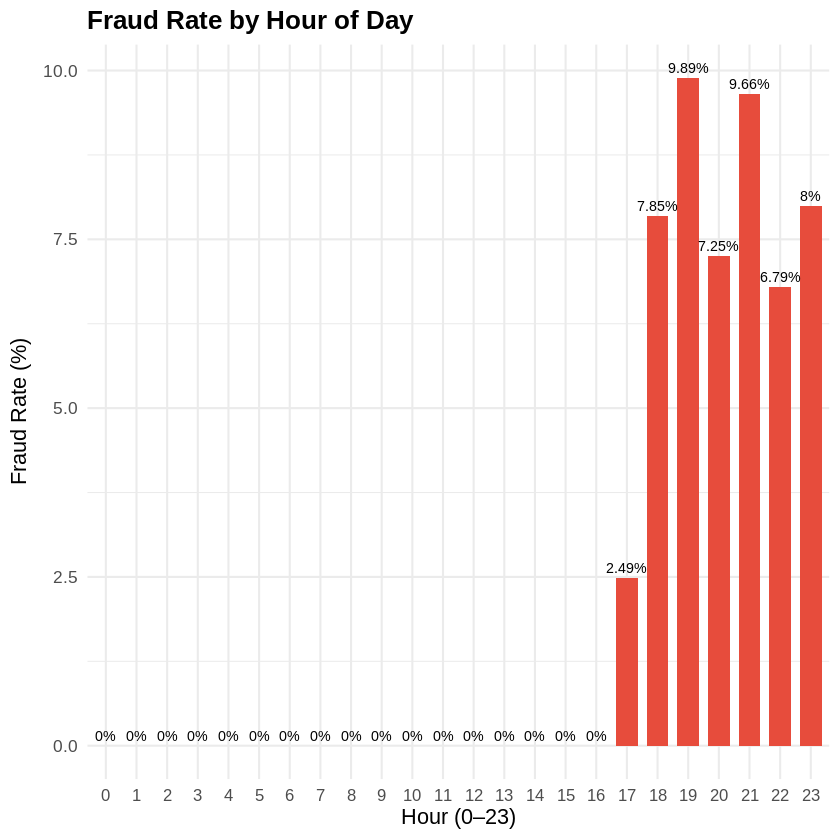

In [5]:
ggplot(hourly_summary, aes(x = factor(Hour), y = FraudRate)) +
  geom_col(fill = "#E74C3C", width = 0.7) +
  geom_text(aes(label = paste0(FraudRate, "%")), vjust = -0.5, size = 3) +
  labs(
    title = "Fraud Rate by Hour of Day",
    x = "Hour (0–23)",
    y = "Fraud Rate (%)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(size = 10),
    plot.title = element_text(face = "bold")
  )